In [5]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import patches as patches
%matplotlib inline

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

data_df = pd.read_csv("iris.txt", names=["A1", "A2", "A3", "A4", 'Class'])
data_df

,A1,A2,A3,A4,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.6,3.1,1.5,0.2,1
3,5.0,3.6,1.4,0.2,1
4,4.6,3.4,1.4,0.3,1
...,...,...,...,...,...
145,6.4,3.1,5.5,1.8,3
146,6.7,3.1,5.6,2.4,3
147,6.8,3.2,5.9,2.3,3
148,6.3,2.5,5.0,1.9,3


In [6]:
del data_df['Class']
data_df

,A1,A2,A3,A4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,4.6,3.4,1.4,0.3
...,...,...,...,...
145,6.4,3.1,5.5,1.8
146,6.7,3.1,5.6,2.4
147,6.8,3.2,5.9,2.3
148,6.3,2.5,5.0,1.9


In [7]:
train = StandardScaler().fit_transform(data_df.values)
pd.DataFrame(train).head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.506521,0.106445,-1.284407,-1.312977
3,-1.021849,1.263460,-1.341272,-1.312977
4,-1.506521,0.800654,-1.341272,-1.181504


In [8]:
import SimpSOM as sps

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!  


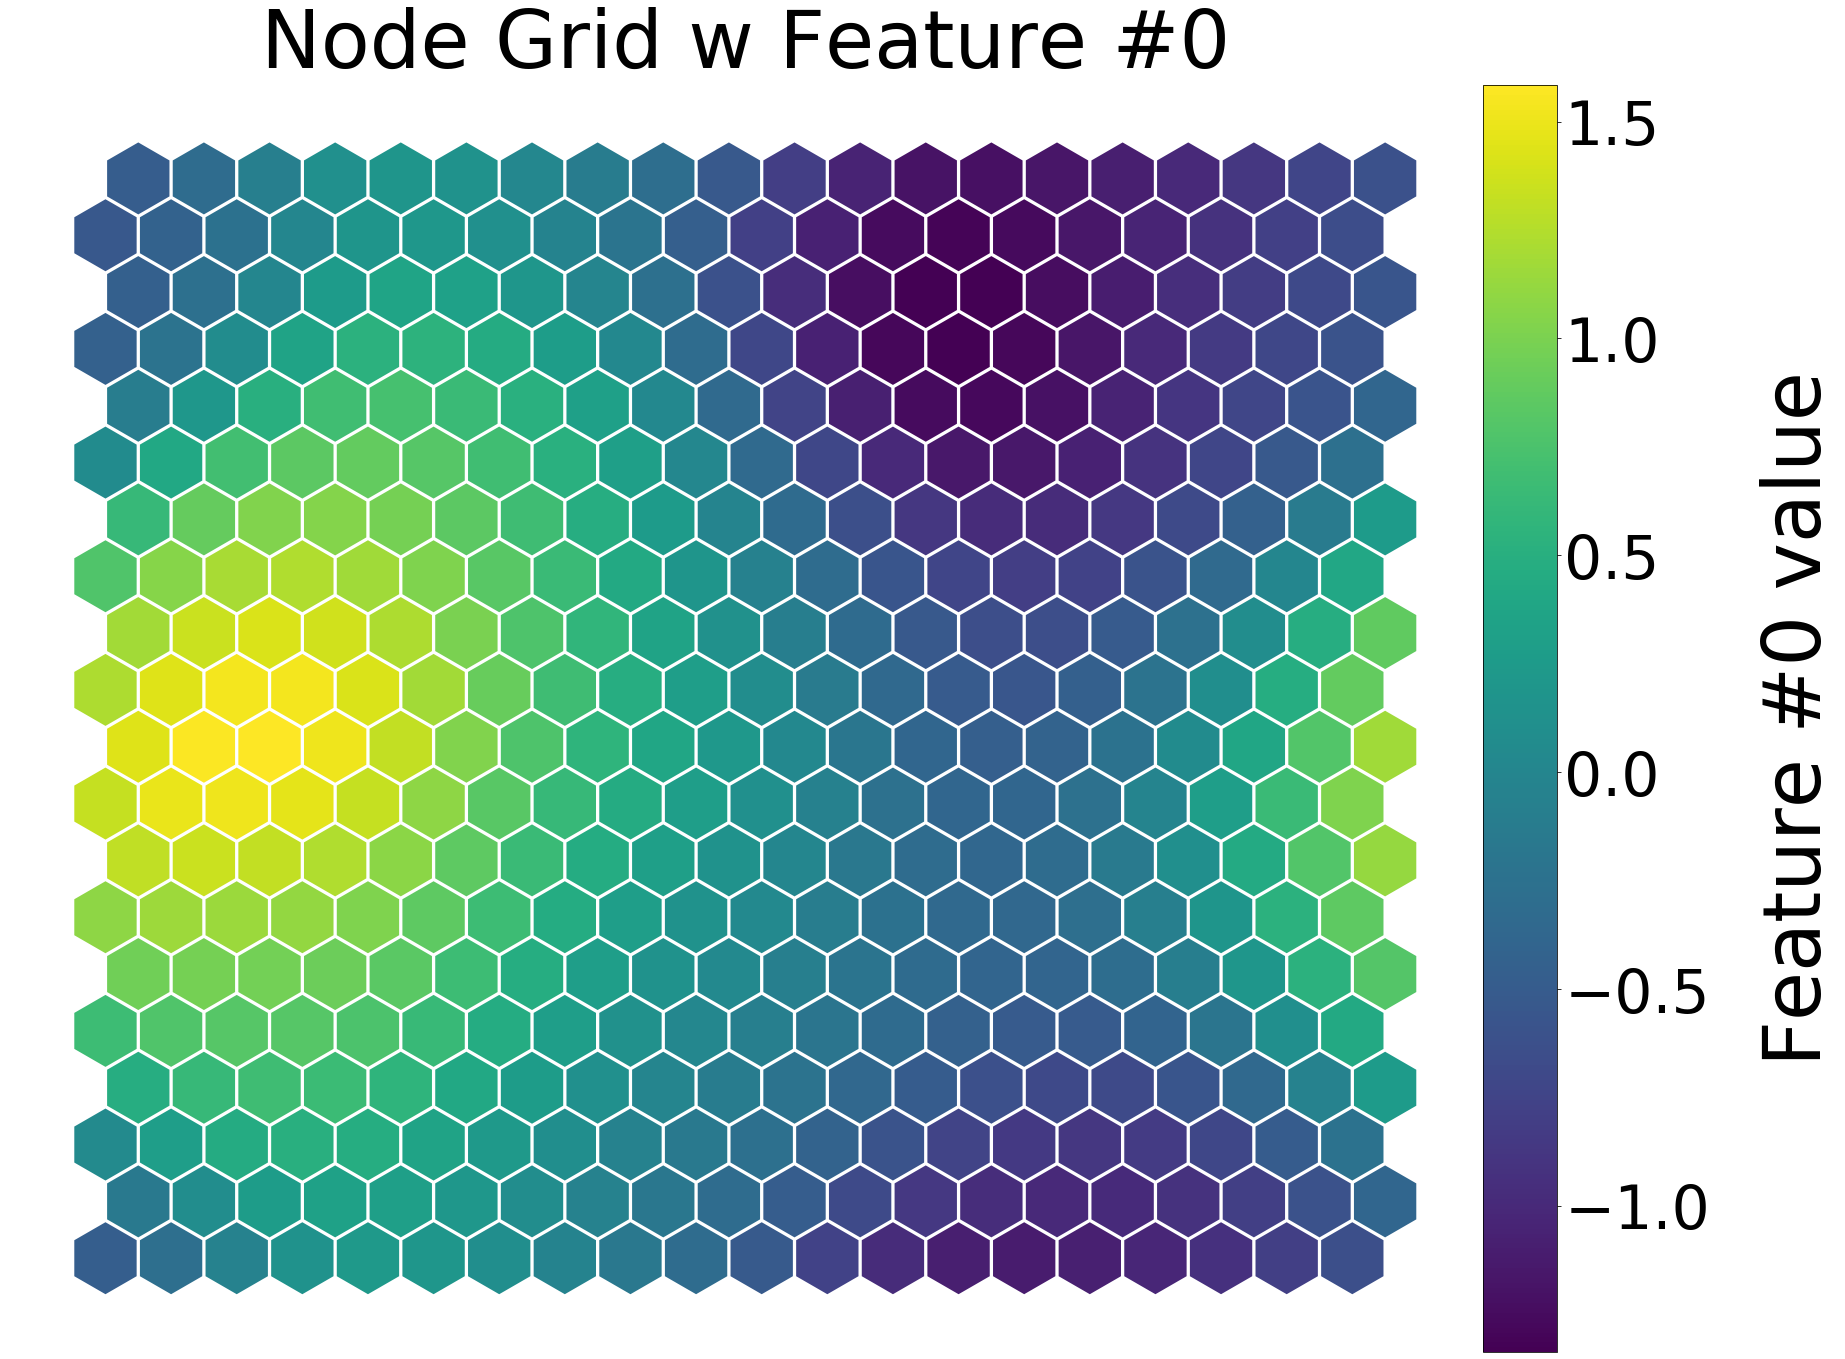

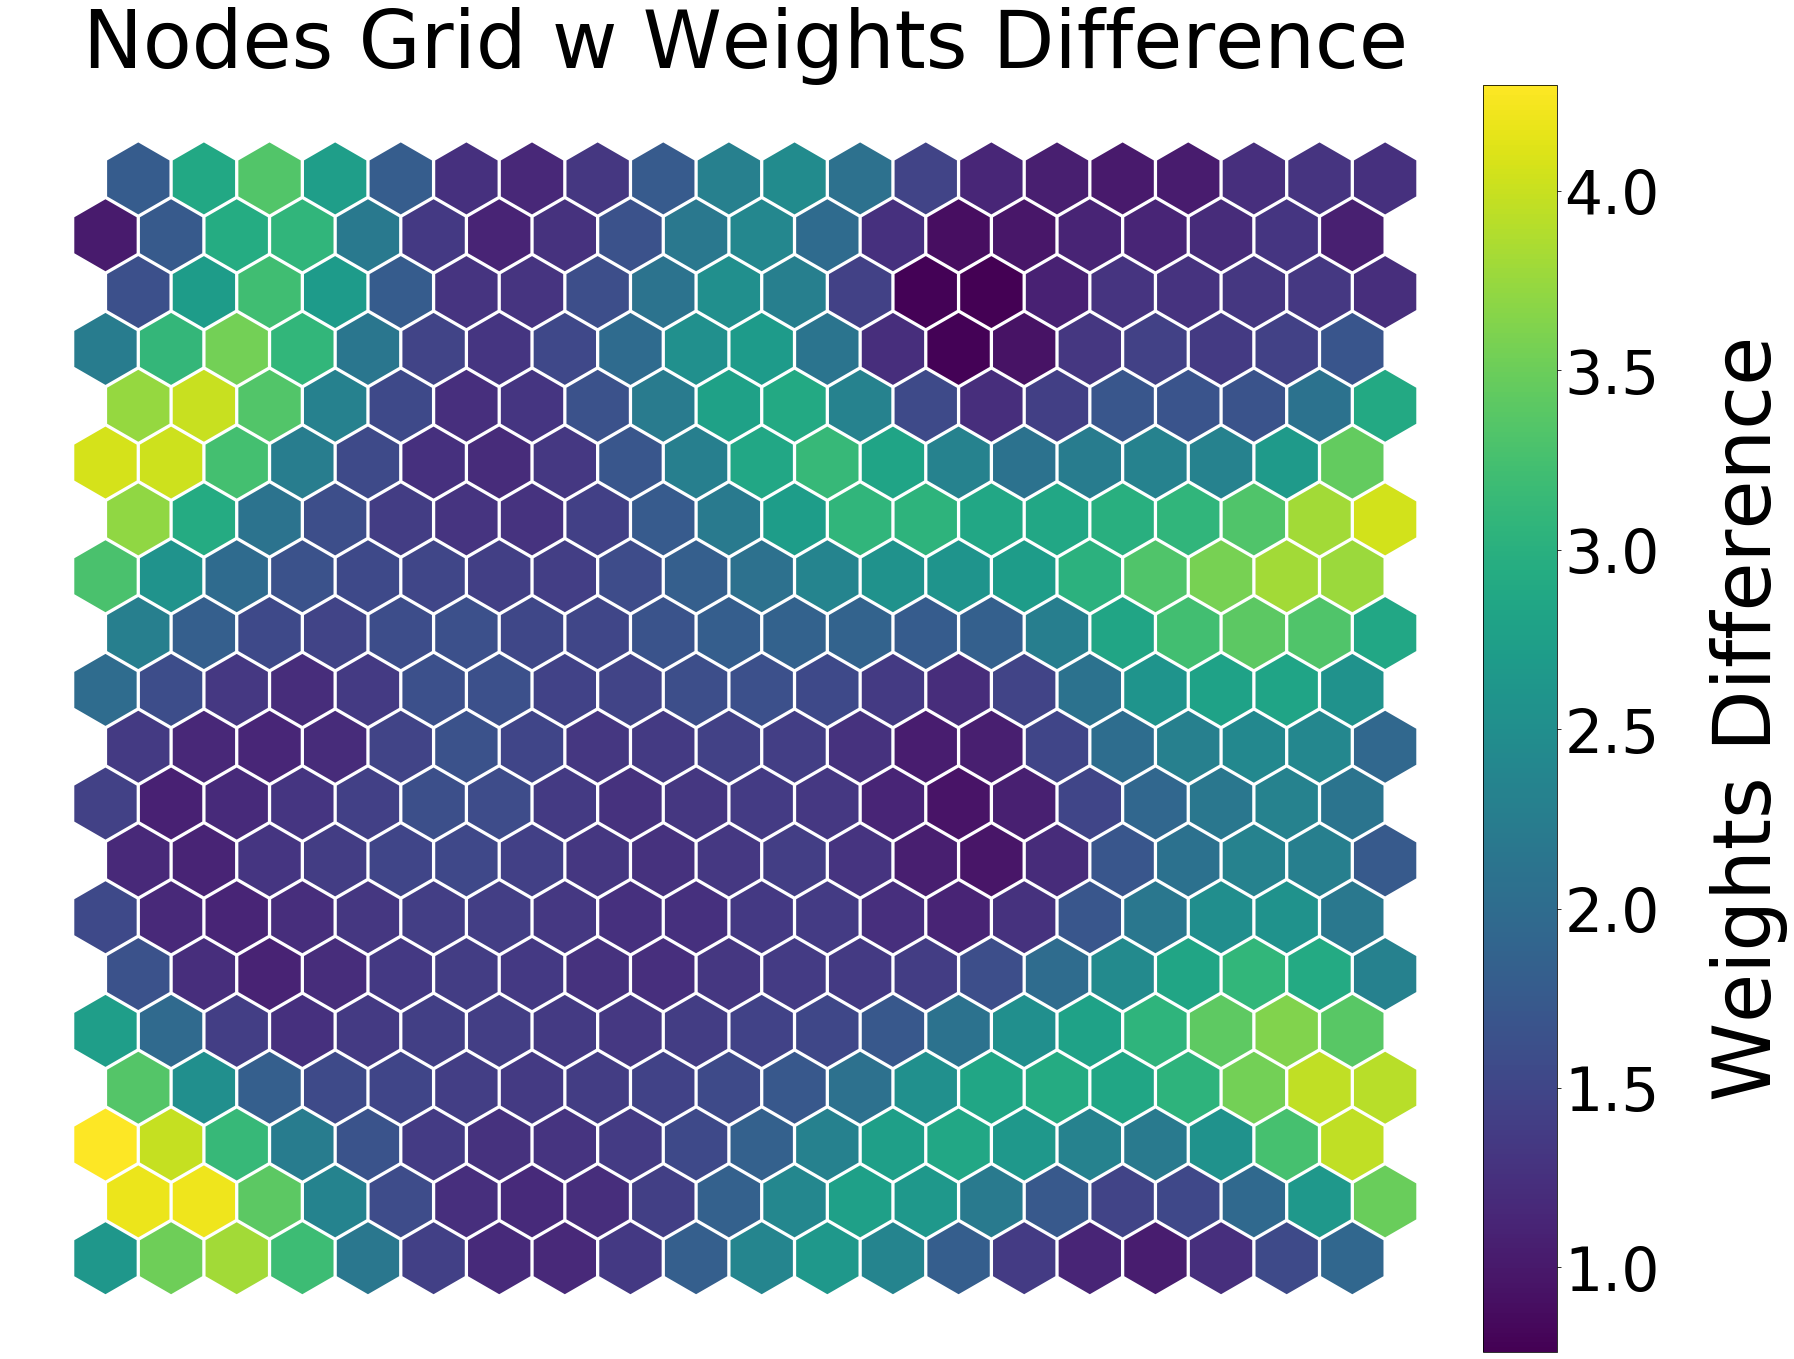

In [9]:
#Build a network 20x20 with a weights format taken from the raw_data and activate Periodic Boundary Conditions. 
net = sps.somNet(20, 20, train, PBC=True)

#Train the network for 10000 epochs and with initial learning rate of 0.01. 
net.train(0.01, 10000)

#Save the weights to file
net.save('filename_weights')

#Print a map of the network nodes and colour them according to the first feature (column number 0) of the dataset
#and then according to the distance between each node and its neighbours.
net.nodes_graph(colnum=0)
net.diff_graph()